
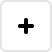
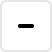
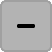
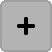
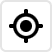
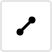
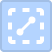
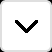
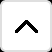
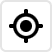
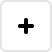
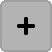
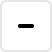
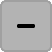
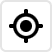
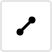
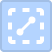
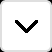
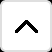
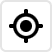

In [1]:
import numpy as np
import pandas as pd
from lets_plot import *
LetsPlot.setup_html()

In [2]:
np.random.seed(42)

In [3]:
n = 50
x = np.arange(n)
y = x + np.random.normal(scale=10, size=n)


#### Default

In [4]:
ggplot({'x': x, 'y': y}, aes(x='x', y='y')) + \
    geom_point() + geom_smooth(labels = smooth_labels()) 

#### This is the equivalent to

In [5]:
ggplot({'x': x, 'y': y}, aes(x='x', y='y')) + \
    geom_point() + geom_smooth() + geom_stat_r2(labels = smooth_labels())

#### You can use `geom_stat_r2()` without `geom_smooth()`.

In [6]:
ggplot({'x': x, 'y': y}, aes(x='x', y='y')) + \
    geom_point() + geom_stat_r2(labels = smooth_labels())

#### `eq` instead default `r2`

In [7]:
ggplot({'x': x, 'y': y}, aes(x='x', y='y')) + \
    geom_point() + geom_smooth(labels = smooth_labels().eq()) 

#### R2 with format

In [8]:
ggplot({'x': x, 'y': y}, aes(x='x', y='y')) + \
    geom_point() + geom_smooth(labels = smooth_labels().rr(format = '{.1f}')) 

#### `eq` with format

In [9]:
ggplot({'x': x, 'y': y}, aes(x='x', y='y')) + \
    geom_point() + geom_smooth(labels = smooth_labels().eq(format = '{.2f}')) 

#### You can replace the left-hand side of the formula or disable it.

In [10]:
plot = ggplot({'x': x, 'y': y}, aes(x='x', y='y')) + geom_point()
gggrid([
    plot + geom_smooth(labels = smooth_labels().eq(with_lhs = 'f(x)')), 
    plot + geom_smooth(labels = smooth_labels().eq(with_lhs = None)), 
])
    

#### You can replace the right-hand side of the formula

In [11]:
ggplot({'x': x, 'y': y}, aes(x='x', y='y')) + geom_point() + \
    geom_smooth(labels = smooth_labels().eq(rhs='t')) 

In [12]:
n = 100
x = np.linspace(-2, 2, n)
y = x ** 2 + np.random.normal(size=n)

In [13]:
ggplot({'x': x, 'y': y}, aes(x='x', y='y')) + \
    geom_point() + \
    geom_smooth(color='red', deg=2, se=False, 
                labels=smooth_labels()
                    .eq(with_lhs = 'f(x)', rhs = 't', format='{.2f}')
                    .rr('{.3f}'), 
                label_x='center', 
                label_y='middle')

In [14]:
t = np.linspace(0, 1, 100)
mean = 1 + np.zeros(2)
cov = np.eye(2)
x, y = np.random.multivariate_normal(mean, cov, t.size).T
df = pd.DataFrame({'t': t, 'x': x, 'y': y})
df = df.melt(id_vars=['t'], value_vars=['x', 'y'])

In [15]:
ggplot(df, aes(x='t', y='value', group='variable')) + \
    geom_point(aes(color='variable'), size=3, alpha=.5) + \
    geom_smooth(aes(color='variable'), size=1, span=.3, deg=5, level=.7, seed=42, labels = smooth_labels().eq().rr())

In [16]:
def generate_exact_parabola(n_points=50, a=1, b=0, c=0):
    """
    Генерирует точные координаты параболы y = ax^2 + bx + c.
    Без шума.
    """
    # 1. Генерируем X (равномерно от -10 до 10)
    x = np.linspace(-10, 10, n_points)
    
    # 2. Вычисляем Y строго по формуле
    y = a * x**2 + b * x + c
    
    # 3. Упаковываем в DataFrame
    df = pd.DataFrame({
        'x': x,
        'y': y
    })
    
    return df

# --- Параметры параболы ---
# Например: y = 2x^2 - 4x + 1
a_true = 2
b_true = -4
c_true = 1

# Генерация данных
df = generate_exact_parabola(n_points=130, a=a_true, b=b_true, c=c_true)

# --- Визуализация ---
plot = (
    ggplot(df, aes(x='x', y='y')) + 
    
    # Слой линии (показывает идеальную форму)
    geom_line(color='#3498db', size=1.0) +
    
    # Слой точек (показывает конкретные сэмплы данных, которые пойдут в эстиматор)
    geom_point(size=4, color='#e74c3c', shape=1) +
    
    # Оформление
    ggtitle(f'Точные данные: y = {a_true}x² + ({b_true})x + {c_true}') +
    labs(x='Аргумент (X)', y='Значение функции (Y)') +
    theme_minimal()
)

plot.show()

ggplot(df, aes(x='x', y='y')) + geom_smooth(deg=2, labels = smooth_labels().eq(), label_x='center') + geom_point()